In [18]:
import matplotlib.pyplot as plt 
import numpy as np 
from PIL import Image
import cv2


In [25]:
def plot_images(imgs, titles):
    fig = plt.figure(figsize=(10, 6))
    for i in range(len(imgs)):
        ax = fig.add_subplot(1, len(imgs), i+1)
        ax.set_title(titles[i])
        ax.imshow(imgs[i], cmap='gray')
    plt.show()

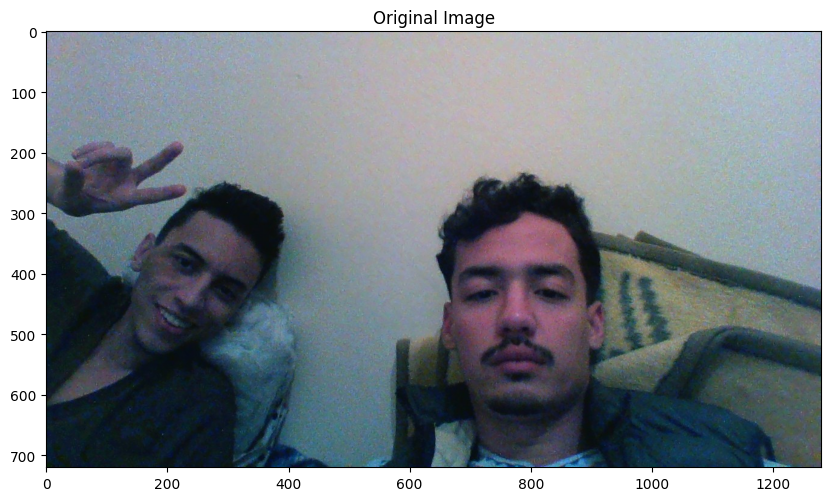

In [26]:
img = Image.open('test.jpg')
plot_images([img], ['Original Image'])

In [23]:
img = img.convert('L')
img = np.array(img)
img

array([[148, 147, 148, ..., 182, 189, 197],
       [149, 145, 143, ..., 181, 189, 198],
       [155, 150, 144, ..., 183, 191, 199],
       ...,
       [ 21,  23,  25, ...,  82,  83,  85],
       [ 23,  23,  25, ...,  84,  82,  80],
       [ 22,  21,  22, ...,  86,  83,  81]], dtype=uint8)

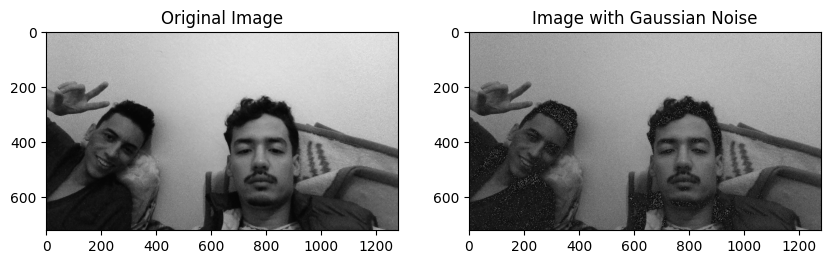

In [24]:
def gauss_Bruit(img, m, sd):
    noise = np.random.normal(loc=m, scale=sd, size=img.shape).astype(np.uint8)
    img_noise = img + noise
    return img_noise

image_noise = gauss_Bruit(img, 0, 10)
plot_images(imgs=[img, image_noise], titles=['Original Image', 'Image with Gaussian Noise'])

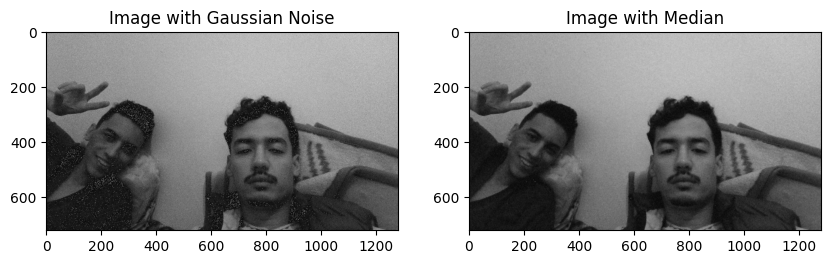

In [27]:
median_blurred = cv2.medianBlur(image_noise, ksize=3)
plot_images(imgs=[image_noise, median_blurred], titles=['Image with Gaussian Noise', 'Image with Median'])

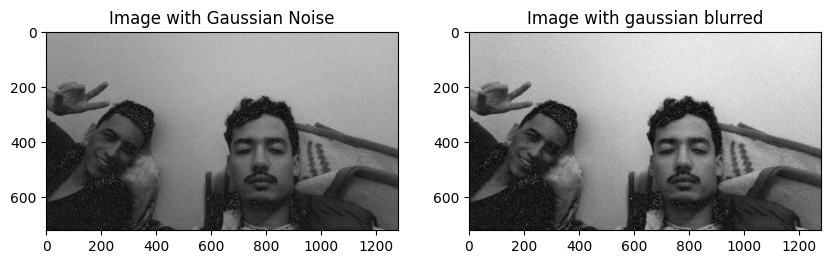

In [28]:
gaussian_blurred = cv2.GaussianBlur(image_noise, (3, 3), 0)
plot_images(imgs=[image_noise, gaussian_blurred], titles=['Image with Gaussian Noise', 'Image with gaussian blurred'])

In [29]:
def filtreNagao(img):
    #img_n = np.copy(img)
    img_n = np.zeros_like(img, dtype=np.float32)

    for i in range(2, img.shape[0] - 2):
        for j in range(2, img.shape[1] - 2):
            x = img[i-2:i+3, j-2:j+3] # bloc 5x5

            
            d1 = np.take(x, indices=[0,1,2,5,6,7,10,11,12])
            d2 = np.take(x, indices=[1,2,3,6,7,8,11,12,13])
            d3 = np.take(x, indices=[2,3,4,7,8,9,12,13,14])

            d4 = np.take(x, indices=[5,6,7,10,11,12,15,16,17])
            d5 = np.take(x, indices=[6,7,8,11,12,13,16,17,18])
            d6 = np.take(x, indices=[7,8,9,12,13,14,17,18,19])

            d7 = np.take(x, indices=[10,11,12,15,16,17,20,21,22])
            d8 = np.take(x, indices=[11,12,13,16,17,18,21,22,23])
            d9 = np.take(x, indices=[12,13,14,17,18,19,22,23,24])
            
            l = [d1, d2, d3, d4, d5, d6, d7, d8, d9]
            
            img_n[i,j] = np.mean(l[np.argmin(np.var(l, axis=0))])            

    return np.clip(img_n, 0,255).astype(np.uint8)


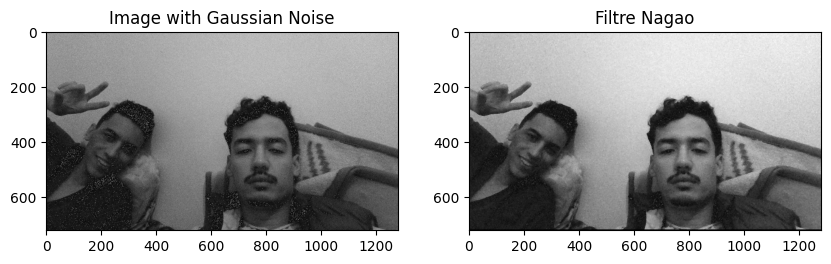

In [31]:
new_img = filtreNagao(image_noise)
plot_images(imgs=[image_noise, new_img], titles=['Image with Gaussian Noise', 'Filtre Nagao'])

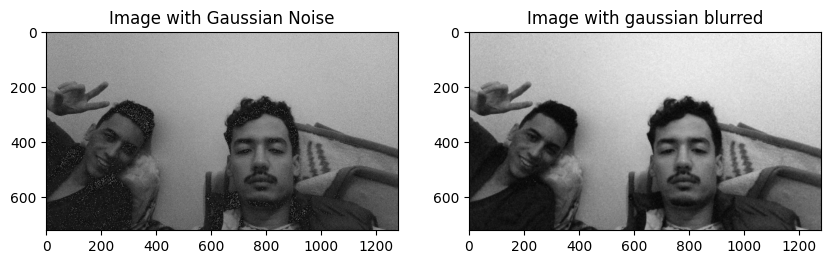

In [32]:
gaussian_blurred = cv2.GaussianBlur(filtreNagao(cv2.medianBlur(image_noise, ksize=3)), (3, 3), 0)
plot_images(imgs=[image_noise, gaussian_blurred], titles=['Image with Gaussian Noise', 'Image with gaussian blurred'])

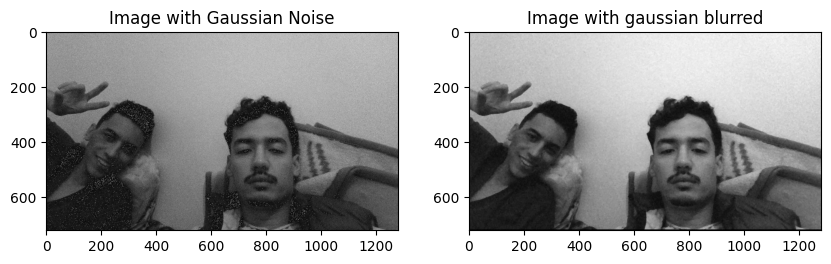

In [33]:
gaussian_blurred = cv2.GaussianBlur(filtreNagao(cv2.medianBlur(image_noise, ksize=3)), (3, 3), 0)
plot_images(imgs=[image_noise, gaussian_blurred], titles=['Image with Gaussian Noise', 'Image with gaussian blurred'])